## University of Virginia - DSI CS5010 Final Project
### Fall 2019
> Yihnew Eshetu, HuiLin Chang, Binyong Liang, and Travis Vitello

### Import neccessary packages

In [2]:
from bokeh.models.annotations import Title
from bokeh.plotting import figure
from bokeh.layouts import layout, column, gridplot, widgetbox, row
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid, Div, Slider, Select, TextInput, RangeSlider, MultiSelect, CheckboxGroup, AutocompleteInput, Panel, Tabs, HoverTool
from bokeh.io import curdoc, output_file, show, output_notebook
from bokeh.models.layouts import LayoutDOM
from math import pi
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction
<br> 
For the final project, the team elected to have each member investigate and present a possible data set with which to work.  HuiLin presented a data set focused on recent IMDB films and television shows, Binyong presented a data set focused on schools in the Commonwealth of Virginia, Travis presented a data set focused on the 2019 results of San Francisco’s Bay to Breakers race, and Yihnew presented a data set focused on current FIFA player statistics.  After much discussion, the team down-selected to Yihnew’s set on October 21st given its breadth (over 16,000 unique players), width (20 columns of data per player), and general appeal (the ubiquitous international popularity of soccer).  The team soon realized that the potential to determine the “best” squads of soccer players across various criteria could not only assist enthusiasts of the video game FIFA 20 (from which the data set was derived) in creating well-composed virtual squads, but could be further extended into the real world to estimate the “best” 
squads by field configuration, then by categories like country, continent, professional league, and so forth.
<br> 
<br> 
**NOTE:** Throughout this report, the term “best” is being considered as the player or squad of players whose overall rating in FIFA 20 (and by extension, the data set used in this program) has the largest relative value.
<br> 
<br>
In conceiving a program that would allow users the ability to choose such “best” squads across such diverse criteria, the question that naturally emerged was: could we have beaten the octopus?  As may be remembered, in 2010 Paul the Octopus gained global acclaim due to the perceived accuracy of his prognostications concerning the results of World Cup matches.  While Paul the Octopus is sadly no longer with us, the spirit of predicting the outcomes of soccer matches is still very much relevant particularly in the sports-betting world.  Having a program that extracts, reads in, and processes current soccer player data could be considered a useful tool for attempting to do such a thing.
<br> 
<br>
It’s noted that to keep the scope of this project limited, the team is only considering active players in the FIFA 20 data set as given by https://www.futbin.com/20/players?page=1&sort=Player_Rating&order=desc&version=gold.  It is also assumed that players can be classified as attacker, midfielder, defender, or goal keeper irrespective of specific positions thereof.  Finally, in predicting the “best” squads, the team assumed that all players belonging to a particular data subset would be available to form such a squad (that is, all squads formed are “ideal” based on current player statistics and rankings, and ignores player injuries, red card status, decisions to sit out, and so forth).
<br> 
<br> 
Beyond developing such a predictive tool, the team also hoped to be able to demonstrate the relationship between various player statistic categories and to be able to make direct, detailed comparisons between players across such categories.  The final intent was to make the tool interactive, intuitive, and visual for the user, which allowed the team an opportunity to gain more experience in using Python libraries like bokeh and seaborn.


## About the data
<br>BeautifulSoup was used to scrape the data from https://www.futbin.com/20/players?page=1&sort=Player_Rating&order=desc&version=gold, a site dedicated to enthusiasts of the FIFA video game series.  In particular, the team elected to focus on player data from the most recent entry in the series, FIFA 20, as this represents current, comprehensive stats for nearly 16,750 FIFA players.  This data includes categories like **name, club, country, league, overall rating, position, skill, weak foot, work rate, pace, shooting (rating), passing (rating), dribbling (rating), defending (rating), physicality (rating), height, base stats, and in-game stats**.   The team subsequently added a category of continent (determined based on the player’s country) and further sub-categorized the players as **attacker, midfielder, defender, and goal keeper** based on the position value.  Refer to the following figure.


## Results

In [5]:
# Read in csv file
fifa = pd.read_csv('FIFA Player Info.csv', keep_default_na = False)
fifa = fifa.drop(columns='Unnamed: 0')

In 2019, a total of 159 countries were represented in FIFA 20. The top three participating countries based on the numbers of players are England, Germany and Spain.

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

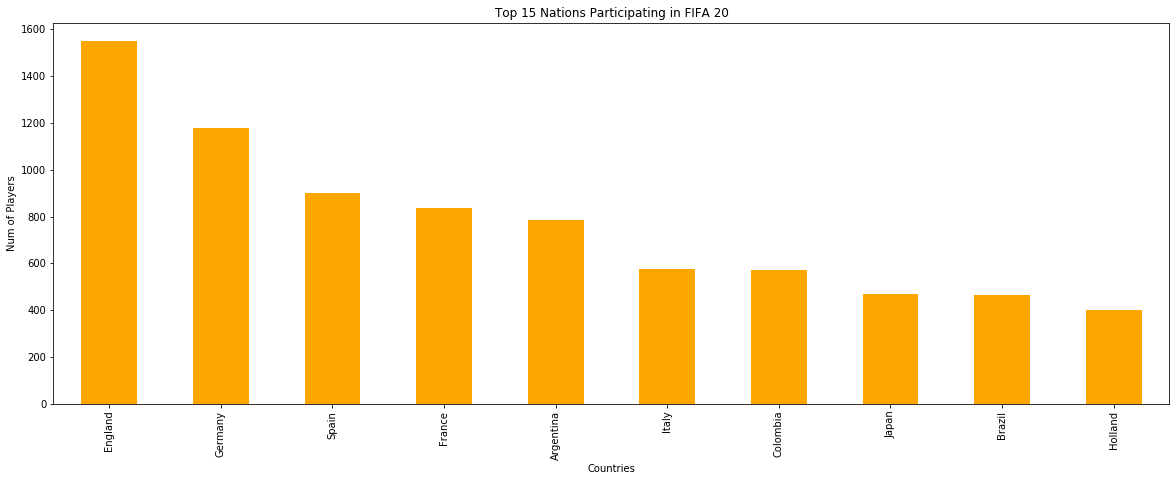

In [60]:
fifa['Country'].value_counts().head(10).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Top 15 Nations Participating in FIFA 20')
plt.xlabel('Countries')
plt.ylabel('Num of Players')
plt

Below is the distrubition of top 10 participating country. Brazil has the highest mean overall rating, while Japan has the lowest mean overall rating. However, Germany has the largest distrubtion as you can see many outliers.

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

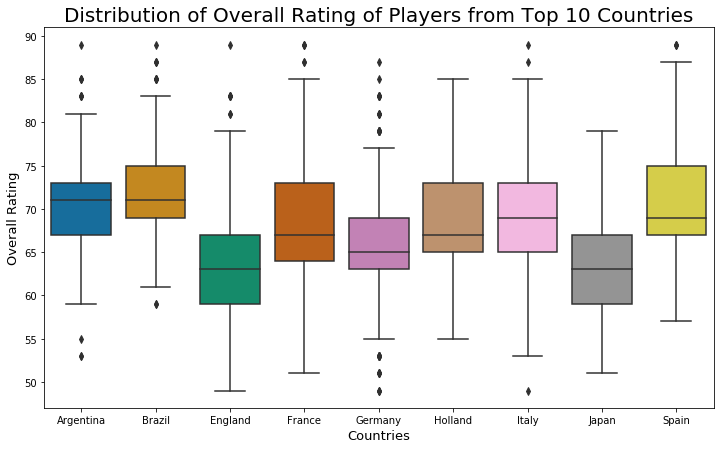

In [61]:
# Top contries overall rating distribution
some_countries = ('England', 'Germany', 'Spain', 'France', 'Argentina', 'Italy', 'Columbia', 'Japan', 'Brazil', 'Holland')
df_countries = fifa.loc[fifa['Country'].isin(some_countries) & fifa['Overall Rating']].sort_values(by = 'Country', ascending = True)

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.boxplot(x = df_countries['Country'], y = df_countries['Overall Rating'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Countries', fontsize = 13)
ax.set_ylabel(ylabel = 'Overall Rating', fontsize = 13)
ax.set_title(label = 'Distribution of Overall Rating of Players from Top 10 Countries', fontsize = 20)
plt

The bar graph belowe reveals the average overall rating of the top 10 countries. Brazil having the highest average overall rating does not necessarily mean the have the best players.

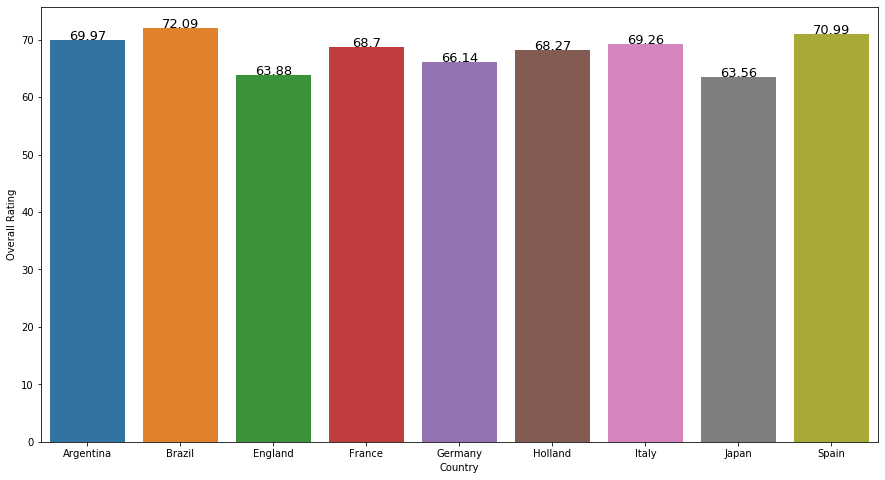

In [103]:
by_country = fifa[fifa.Country.isin(some_countries)==True]
by_country = by_country.groupby('Country')['Overall Rating'].mean()
by_country.sort_values(ascending = True).head(10)
b = plt.figure(figsize=(15,8))
bx1 = b.add_subplot(111)

xvalue = by_country.index
yvalue = by_country.values
g = sns.barplot(xvalue, yvalue) 
b = plt.ylabel("Overall Rating")

def barlabel(series):
    i = 0
    for index, row in series.items():
        g.text(i, row, round(row, 2), color='black', ha="center", fontsize = 13)
        i = i + 1
barlabel(by_country)

**Comparsion of 2 Players**
<br>
User can enter or select 2 players to compare. The pie chart allows a side by side comparsion of each skill Rating between 2 players. The default players selected are the top 2 players, Lionel Messi and Ronaldo.

In [6]:
data = fifa[['Name','Pace', 'Shooting','Passing', 'Dribbling', 'Defending', 'Physicality']]
HeatmapData = data.groupby('Name').mean()
labels = np.array(HeatmapData.columns.values)
N = len(labels)

angles2 = []
for i in range(N):
    ang = 90 + i*180/np.pi
    if ang > 360:
        ang = abs(360 - ang)
    angles2.append(ang)
angles2.sort()
angles = [ math.radians(i) for i in angles2]

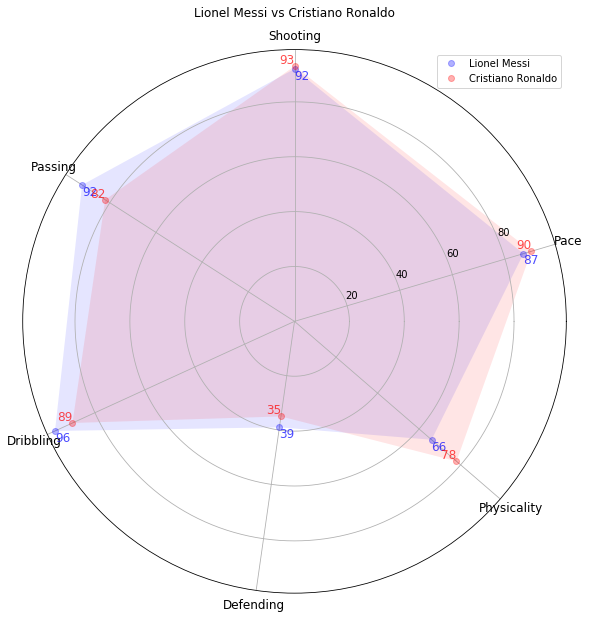

In [8]:
name = fifa.Name.tolist()[0]
name2 = fifa.Name.tolist()[1]
stats = HeatmapData.loc[name, labels]

fig1 = plt.figure(figsize=(12,10))
ax1 = fig1.add_subplot(111, polar=True)
ax1.plot(angles, stats, 'bo', linewidth=1,alpha=0.3)
ax1.fill(angles, stats, 'b', alpha=0.1)
stats2=HeatmapData.loc[name2,labels]
ax1.plot(angles, stats2, 'ro', linewidth=1,alpha=0.3)
ax1.fill(angles, stats2, 'r', alpha=0.1)
ax1.set_thetagrids(angles2, labels, fontsize=12)
ax1.set_title(name + " vs " + name2)
ax1.set_label('Label via method')
for i in range(N):
    ax1.text(angles[i], stats[i], str(int(stats[i])),color='blue', alpha=0.7,fontsize=12,verticalalignment='top', horizontalalignment='left',)
    ax1.text(angles[i], stats2[i], str(int(stats2[i])),color='red', alpha=0.7,fontsize=12,verticalalignment='bottom', horizontalalignment='right')
ax1.legend([name, name2], loc=1)
ax1.grid(True)

**Positions**
<br>
There are a total of 17 positions in FIFA 20. The most common positions are Center Back (CB), Striker (ST), and Central Midfielder (CM)

Text(0.5, 1.0, 'Comparison of Positions and Players')

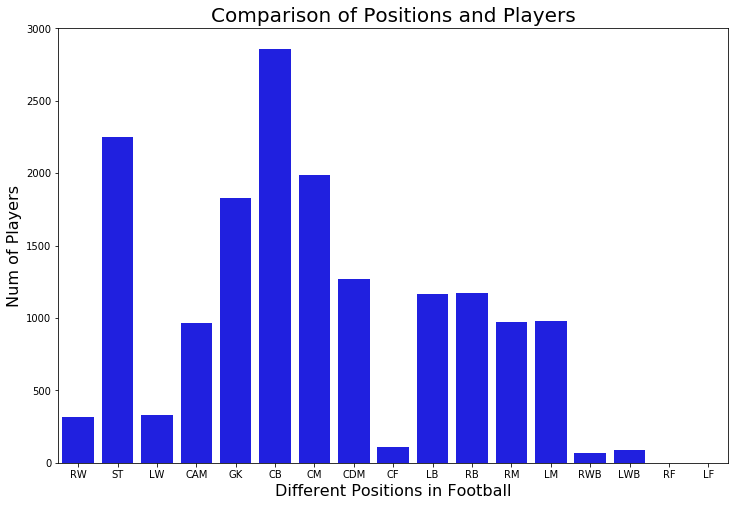

In [11]:
fig = plt.figure(figsize = (12, 8))
ax = sns.countplot('Position', data = fifa, color = 'blue')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Num of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)

**Top 4 skill set for each position**
<br>
Users need to be able to identify top skill set for each position. Having such information aids in the selection of players when creating a team or selecting what team to use. 

In [4]:
# defining the features of players
player_features = ('Pace', 'Shooting', 'Passing', 
                   'Dribbling', 'Defending', 'Physicality')

# Top five features for every position in football
for i, val in fifa.groupby(fifa['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Pace, Dribbling, Passing, Shooting
Position CB: Physicality, Defending, Pace, Dribbling
Position CDM: Physicality, Defending, Dribbling, Passing
Position CF: Pace, Dribbling, Shooting, Passing
Position CM: Dribbling, Pace, Physicality, Passing
Position GK: Dribbling, Pace, Physicality, Shooting
Position LB: Pace, Physicality, Dribbling, Defending
Position LF: Dribbling, Pace, Shooting, Physicality
Position LM: Pace, Dribbling, Passing, Shooting
Position LW: Pace, Dribbling, Shooting, Passing
Position LWB: Pace, Physicality, Dribbling, Defending
Position RB: Pace, Physicality, Dribbling, Defending
Position RF: Pace, Dribbling, Shooting, Passing
Position RM: Pace, Dribbling, Passing, Shooting
Position RW: Pace, Dribbling, Shooting, Passing
Position RWB: Pace, Physicality, Dribbling, Defending
Position ST: Pace, Physicality, Shooting, Dribbling


**Create Slider, MultiSelect, and Input for Scatter Plot**
<br>
Users have the ability to filter data to a certain player or range of overall rating or skill level. Or select multiple clubs, leagues, countries, or positions. Using this scatter plot users can idenitfy relationships between attributes or group of players.

In [67]:
player = AutocompleteInput(title="Player Name", completions=fifa.Name.tolist())
overall_rating = RangeSlider(title="Overall Rating", start=fifa['Overall Rating'].min(), end=fifa['Overall Rating'].max(), value=(fifa['Overall Rating'].min(), fifa['Overall Rating'].max()), step=1)
skill = RangeSlider(title="Skill", start=fifa['Skill'].min(), end=fifa['Skill'].max(), value=(fifa['Skill'].min(), fifa['Skill'].max()), step=1, default_size = 400)
club = MultiSelect(title="Clubs", options=fifa.sort_values('Club').Club.unique().tolist(), size =  10)
league = MultiSelect(title="Leagues", options=fifa.sort_values('League').League.unique().tolist(), size =  10)
country = MultiSelect(title="Countries", options=fifa.sort_values('Country').Country.unique().tolist(), size =  10)
position = MultiSelect(title="Positions", options=['CF', 'ST', 'RW', 'RF', 'LW', 'LF', 'RM', 'LM', 'CAM', 'CM', 'CDM', 'LB', 'LWB', 'RB', 'RWB', 'CB', 'GK'], size =  10)

**Create Scatter Plot and HTML Code for Interface**
<br>
Using columndata source to allow user to hover over datapoint to obtain additional information about each player.

In [68]:
axis_map = dict(zip(fifa.select_dtypes(include='int64').columns.values, fifa.select_dtypes(include='int64').columns.values))
x_axis = Select(title="X Axis", options=sorted(axis_map.keys()), value="Dribbling")
y_axis = Select(title="Y Axis", options=sorted(axis_map.keys()), value="Passing")

source = ColumnDataSource(data=dict(x=[], y=[], color=[], legend=[], player=[], overallrating=[], club=[], league=[], country = [], position=[]))
TOOLTIPS=[
    ("Player", "@player"),
    ("Overall Rating", "@overallrating"),
    ("Club", "@club"),
    ("League", "@league"),
    ("Country", "@country"),
    ("Position", "@position")
]
p = figure(plot_height=600, plot_width=700, tooltips=TOOLTIPS, sizing_mode="scale_both")

p.circle(x="x", y="y", source=source, size=10, color = "color", line_color='grey', hover_fill_color='black', 
         hover_alpha=0.5, legend="legend")

desc = Div(text="""<style>
h1 {
    margin: 1em 0 0 0;
    color: #2e484c;
    font-family: 'Julius Sans One', sans-serif;
    font-size: 1.8em;
    text-transform: uppercase;
}
a:link {
    font-weight: bold;
    text-decoration: none;
    color: #0d8ba1;
}
a:visited {
    font-weight: bold;
    text-decoration: none;
    color: #1a5952;
}
a:hover, a:focus, a:active {
    text-decoration: underline;
    color: #9685BA;
}
p {
    font: "Libre Baskerville", sans-serif;
    text-align: justify;
    text-justify: inter-word;
    width: 80%;
    max-width: 800;
}

</style>

<h1>An Interactive Explorer of FIFA 2020 Player Data</h1>

<p>
Interact with the widgets on the left to query a subset of players to plot.
Hover over the circles to see more information about each player.
</p>""",
sizing_mode="stretch_width")

### Select function updates the plot based on user selection

In [69]:
def select_fifa():
    # Stores the values selected by the user
    overall_rating_val = overall_rating.value
    skill_level = skill.value
    player_val = player.value
    league_val = league.value
    club_val = club.value
    country_val = country.value
    position_val = position.value
    
    # Filter FIFA data based on overall rating and skill
    selected = fifa[
        (fifa['Overall Rating'] >= overall_rating_val[0]) &
        (fifa['Overall Rating'] <= overall_rating_val[1]) &
        (fifa['Skill'] >= skill_level[0]) &
        (fifa['Skill'] <= skill_level[1])
    ]
    
    # Filter FIFA data if player name, league, club, or position is not null
    if (player_val != ""):
        selected = selected[selected.Name.str.contains(player.value)==True]
    if (len(league_val) != 0):
        selected = selected[selected.League.isin(league_val)==True]
    if (len(club_val) != 0):
        selected = selected[selected.Club.isin(club_val)==True]
    if (len(country_val) != 0):
        selected = selected[selected.Country.isin(country_val)==True]
    if (len(position_val) != 0):
        selected = selected[selected.Position.isin(position_val)==True]
    
    # Calculate 75th, 50th, and 25th percentile
    per75 = np.percentile(selected[y_axis.value], 75)
    per50 = np.percentile(selected[y_axis.value], 50)
    per25 = np.percentile(selected[y_axis.value], 25)
    
    # Color each player based on percentile group
    selected["color"] = np.where(selected[y_axis.value] > per50, np.where(selected[y_axis.value] > per75,'#29788E', '#79D151'), np.where(selected[y_axis.value] < per25, '#8C2980', '#FD9F6C') ) 
    # Create legend
    selected["legend"] = np.where(selected[y_axis.value] > per50, np.where(selected[y_axis.value] > per75,'Top 25th Percentile', '75th Percentile'), np.where(selected[y_axis.value] < per25, 'Bottom 25th Percentile', '50th Percentile') )
    return selected

### Update function calls select_fifa() function to update plot automatically

In [70]:
def update():
    # Retrieve the subset of data to plot
    df = select_fifa()

    # X and Y axis value selected by the user
    #x_name = axis_map.get(x_axis.value)
    #y_name = axis_map.get(y_axis.value)
    x_name = x_axis.value
    y_name = y_axis.value

    # Labels
    p.xaxis.axis_label = x_axis.value
    p.yaxis.axis_label = y_axis.value
    p.xaxis.axis_label_text_font_size = "14pt"
    p.yaxis.axis_label_text_font_size = "14pt"
    p.xaxis.major_label_text_font_size = "12pt"
    p.yaxis.major_label_text_font_size = "12pt"
    
    # Title text
    p.title.text = str(len(df)) + " Players selected                                                              " + x_axis.value + ' vs ' + y_axis.value
    p.title.text_font_size = '16pt'
    
    # Legend position
    p.legend.location = "top_left"
    
    # Source data for scatter plot
    source.data = dict(
        x=df[x_name],
        y=df[y_name],
        color=df["color"],
        legend=df["legend"],
        player=df["Name"],
        club=df["Club"], 
        league=df["League"], 
        position=df["Position"], 
        country=df['Country'],
        overallrating=df["Overall Rating"],
    )

# Check if the user input has changed
controls = [player, overall_rating, skill, league, club, country, position, x_axis, y_axis]
for control in controls:
    control.on_change('value', lambda attr, old, new: update())

# Layout of first tab
inputs = column(*controls, width=350, height=1000)
inputs.sizing_mode = "fixed"
l = layout([
    [desc],
    [inputs, p],
], sizing_mode="scale_both")


###  Create Select for Histogram

In [71]:
# X axis that user can select from
hist_x_axis = ['Skill', 'Weak Foot', 'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality', 'Height']

club3 = Select(title="Clubs", value = 'Any', options=['Any'] + fifa.sort_values('Club').Club.unique().tolist())
league3 = Select(title="Leagues", value = 'Any', options=['Any'] + fifa.sort_values('League').League.unique().tolist())
country3 = Select(title="Countries", value = 'Any', options=['Any'] + fifa.sort_values('Country').Country.unique().tolist())
position3 = Select(title="Position Groups", value = 'Any', options=['Any'] + fifa.sort_values('Position Group')['Position Group'].unique().tolist())
skills3 = Select(title="Skills", value = 'Passing', options=hist_x_axis)

### Create Histogram and html code for describing the interface

In [72]:
arr_src = ColumnDataSource(data=dict(count=[],left=[], right=[], f_count=[], f_interval=[]))

p3 = figure(plot_height=700, plot_width=1200, sizing_mode="scale_both",
                background_fill_color="#fafafa")

p3.quad(bottom=0, 
           top='count', 
           left='left', 
           right='right', 
           source=arr_src,
           hover_fill_alpha=0.5,
           hover_fill_color='grey',
           fill_color="orange", 
           line_color="black", 
            alpha=0.7)

# Title
p3.title.align = 'center'
p3.title.text = "Histogram of " + skills3.value + " Rating"

# Axis labels
p3.xaxis.axis_label = skills3.value + " Rating"
p3.yaxis.axis_label = "Number of Players"
p3.title.text_font_size = '16pt'
p3.xaxis.axis_label_text_font_size = "14pt"
p3.yaxis.axis_label_text_font_size = "14pt"
p3.xaxis.major_label_text_font_size = "12pt"
p3.yaxis.major_label_text_font_size = "12pt"

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [(skills3.value, '@f_interval'),
                                  ('Count', '@f_count')])

# Add the hover tool to the graph
p3.add_tools(hover)

desc3 = Div(text="""<style>
h1 {
    margin: 1em 0 0 0;
    color: #2e484c;
    font-family: 'Julius Sans One', sans-serif;
    font-size: 1.8em;
    text-transform: uppercase;
}
a:link {
    font-weight: bold;
    text-decoration: none;
    color: #0d8ba1;
}
a:visited {
    font-weight: bold;
    text-decoration: none;
    color: #1a5952;
}
a:hover, a:focus, a:active {
    text-decoration: underline;
    color: #9685BA;
}
p {
    font: "Libre Baskerville", sans-serif;
    text-align: justify;
    text-justify: inter-word;
    width: 80%;
    max-width: 800;
}

</style>

<h1>An Interactive Explorer of FIFA 2020 Player Data</h1>

<p>
Interact with the widgets below to explore the distribution of players' skill.
</p>""",
sizing_mode="stretch_width")

### Select function updates the histogram based on user selection

In [73]:
def select_hist():
    # Stores the values selected by the user
    club3_val = club3.value
    league3_val = league3.value
    country3_val = country3.value
    position3_val = position3.value
    skills3_val = skills3.value
    
    selected = fifa
    
    # Filter FIFA data if league, club, country, or position is not null
    if (club3_val != 'Any'):
        selected = selected[selected.Club == club3_val]
    if (league3_val != 'Any'):
        selected = selected[selected.League == league3_val]
    if (country3_val != 'Any'):
        selected = selected[selected.Country == country3_val]
    if (position3_val != 'Any'):
        selected = selected[selected['Position Group'] == position3_val]
    
    return selected, skills3_val

### Update function calls select_hist() function to update histogram automatically

In [74]:
def update3():
    # Retrieve the subset of data to use
    df, skill = select_hist()
    arr_hist, edges = np.histogram(df[skill], density=False, bins='auto')

    # Column data source
    arr_df = pd.DataFrame({'count': arr_hist, 'left': edges[:-1], 'right': edges[1:]})
    arr_df['f_count'] = ['%d' % count for count in arr_df['count']]
    arr_df['f_interval'] = ['%d to %d ' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]
    
    # Update Title and X-axis
    p3.title.text = "Histogram of " + skill + " Rating"
    p3.xaxis.axis_label = skill + " Rating"
    
    # Add a hover tool referring to the formatted columns
    hover = HoverTool(tooltips = [(skill, '@f_interval'),
                                  ('Count', '@f_count')])
    # Add the hover tool to the graph
    p3.add_tools(hover)
    
    # Source data for Histogram
    arr_src.data = dict(count=arr_df['count'],
                        left=arr_df['left'], 
                        right=arr_df['right'], 
                        f_count=arr_df['f_count'], 
                        f_interval=arr_df['f_interval'],) 

# Check if the user input has changed    
controls3 = [club3, league3, country3, position3, skills3]

for control in controls3:
    control.on_change('value', lambda attr, old, new: update3())

# Layout of second tab
inputs3 = row(*controls3)
inputs3.sizing_mode = "fixed"
l3 = column(row(desc3),row(club3, league3, country3, position3,skills3),row(p3))

TypeError: 'float' object is not callable

### Best Starting 11

In [75]:
# Formation to select from
formation_list = ['Any','442', '433', '451', '352']

# Remove countries without enough players
countrylist = fifa.groupby('Country')
minplayers = countrylist.filter(lambda x: x['Overall Rating'].count() > 18)

# Skill set
best_x_axis = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Overall Rating']

#### Create Select and MultiSelect

In [76]:
skills2 = Select(title="Skills", value = 'Overall Rating', options=best_x_axis)
formation = Select(title="Formation", value = 'Any', options=formation_list)
club2 = MultiSelect(title="Clubs", options=fifa.sort_values('Club').Club.unique().tolist(), size =  10)
league2 = MultiSelect(title="Leagues", options=fifa.sort_values('League').League.unique().tolist(), size =  10)
country2 = MultiSelect(title="Countries", options=minplayers.sort_values('Country').Country.unique().tolist(), size =  10)
continent = MultiSelect(title="Continent", options=fifa.sort_values('Continent').Continent.unique().tolist(), size = 6)

### Create Plot of Best Starting 11 and html code for describing the interface

In [77]:
source2 = ColumnDataSource(data=dict(x=[], y=[], color=[], legend=[], player=[], club=[], league=[], 
                                   country = [], continent= [], overallrating=[], pace=[], shooting=[],
                                   passing=[], dribbling=[], defending=[], physicality=[]))
TOOLTIPS2=[
    ("Player", '@player'),
    ("Club", "@club"),
    ("League", "@league"),
    ("Country", "@country"),
    ("Continent", "@continent"),
    ("Overall Rating", "@overallrating"),
    ("Pace", "@pace"),
    ("Shooting", "@shooting"),
    ("Passing", "@passing"),
    ("Dribbling", "@dribbling"),
    ("Defending", "@defending"),
    ("Physicality", "@physicality")
]
p2 = figure(plot_height=900, plot_width=1000, tooltips=TOOLTIPS2, sizing_mode="scale_both", x_range=(5, 130))
p2.circle(x="x", y="y", source=source2, size=75, color = "color", line_color='grey', hover_fill_color='black', 
         hover_alpha=0.5, legend="legend")

desc2 = Div(text="""<style>
h1 {
    margin: 1em 0 0 0;
    color: #2e484c;
    font-family: 'Julius Sans One', sans-serif;
    font-size: 1.8em;
    text-transform: uppercase;
}
a:link {
    font-weight: bold;
    text-decoration: none;
    color: #0d8ba1;
}
a:visited {
    font-weight: bold;
    text-decoration: none;
    color: #1a5952;
}
a:hover, a:focus, a:active {
    text-decoration: underline;
    color: #9685BA;
}
p {
    font: "Libre Baskerville", sans-serif;
    text-align: justify;
    text-justify: inter-word;
    width: 80%;
    max-width: 800;
}

</style>

<h1>An Interactive Explorer of FIFA 2020 Player Data</h1>

<p>
Interact with the widgets on the left to discover the best starting 11 players.
Hover over the circles to see more information about each player.
</p>""",
sizing_mode="stretch_width")

In [78]:
def bestplayers(df, formation, skill):
    # Each position group
    df_GK = df[df['Position Group'] == 'Goal Keeper']
    df_DD = df[df['Position Group'] == 'Defender']
    df_MD = df[df['Position Group'] == 'Midfielder']
    df_AK = df[df['Position Group'] == 'Attacker']
    
    # Number of Defenders, Midfielders, and Attackers
    i = int(formation[0])
    j = int(formation[1])
    k = int(formation[2])
    
    # Best Goalie, Defenders, Midfielders, and Attackers based on the formation and skill
    team = df_GK.nlargest(1, skill)
    team = team.append(df_DD.nlargest(i, skill))
    team = team.append(df_MD.nlargest(j, skill))
    team = team.append(df_AK.nlargest(k, skill))
    return team

def bestformation(df, formation, skill):
    # Formation selected
    formation2_value = formation

    # If formation is Any then pick the formation with the highest mean skill rating
    if formation2_value == 'Any':
        best_formation = [0,'formation']
        new_formation_list = ['442', '433', '451', '352']
        for i in new_formation_list:
            if bestplayers(df, i, skill)[skill].mean() > best_formation[0]:
                best_formation[0] = bestplayers(df, i, skill)[skill].mean()
                best_formation[1] = i
        best_formation = best_formation[1]
    else:
        best_formation = formation2_value
    
    # Return the best starting 11
    best = bestplayers(df, best_formation, skill)
    
    # Based on the formation define where to plot each player
    if best_formation == '442':
        best['X'] = [62.5, 25, 50, 75, 100, 25, 50, 75, 100, 41.7, 83.3]
        best['Y'] = [40, 60, 60, 60, 60, 85, 85, 85, 85, 110, 110]
    if best_formation == '433':
        best['X'] = [62.5, 25, 50, 75, 100, 31.3, 62.5, 93.75, 31.3, 62.5, 93.75]
        best['Y'] = [40, 60, 60, 60, 60, 85, 85, 85, 110, 110, 110]
    if best_formation == '451':
        best['X'] = [62.5, 25, 50, 75, 100, 20.8, 41.7, 62.5, 83.3, 104.2, 62.5]
        best['Y'] = [40, 60, 60, 60, 60, 85, 85, 85, 85, 85, 110]
    if best_formation == '352':
        best['X'] = [62.5, 31.3, 62.5, 93.75, 20.8, 41.7, 62.5, 83.3, 104.2, 41.7, 83.3]
        best['Y'] = [40, 60, 60, 60, 85, 85, 85, 85, 85, 110, 110]
        
    return best


In [89]:
def select_fifa2():
    formation_val = formation.value
    club_val = club2.value
    league_val = league2.value
    country_val = country2.value
    continent_val = continent.value
    
    selected = fifa
    if (len(league_val) != 0):
        selected = selected[selected.League.isin(league_val)==True]
    if (len(club_val) != 0):
        selected = selected[selected.Club.isin(club_val)==True]
    if (len(country_val) != 0):
        selected = selected[selected.Country.isin(country_val)==True]
    if (len(continent_val) != 0):
        selected = selected[selected.Continent.isin(continent_val)==True]
        
    selected = bestformation(selected, formation_val, skills2.value)
    
    # Color code each position group
    color = []
    for column in selected['Position Group']:
        if column == 'Goal Keeper':
            color.append('#29788E')
        if column == 'Defender':
            color.append('#79D151')    
        if column == 'Midfielder':
            color.append('#8C2980')
        if column == 'Attacker':
            color.append('#FD9F6C')
    selected["color"] = color
    # Legend
    selected["legend"] = selected['Position Group']
    return selected

def update2():
    df = select_fifa2()
    
    # No x and y axis
    p2.xgrid.grid_line_color = None
    p2.ygrid.grid_line_color = None
    # Title
    p2.title.text = "Best Starting 11 Based on " + formation.value + " Formation & " + skills2.value
    p2.title.text_font_size = '16pt'
    # Legend
    p2.legend.location = "top_right"
    p2.axis.visible = False
    
    # Source data for plot
    source2.data = dict(
        x=df['X'],
        y=df['Y'],
        color=df["color"],
        legend=df["legend"],
        player=df["Name"],
        club=df["Club"], 
        league=df["League"], 
        country=df["Country"],
        continent=df["Continent"],
        overallrating=df['Overall Rating'],
        pace=df["Pace"],
        shooting=df["Shooting"],
        passing=df["Passing"],
        dribbling=df["Dribbling"],
        defending=df["Defending"],
        physicality=df["Physicality"],
    )

# Check if the user input has changed       
controls2 = [club2, league2, country2, continent, skills2, formation]
for control in controls2:
    control.on_change('value', lambda attr, old, new: update2())

# Layout of third tab
inputs2 = column(club2, league2, country2, continent, width=320, height=850)
inputs2.sizing_mode = "fixed"
l2 = column(row(desc2),row(inputs2, p2, column(formation, skills2)))

In [90]:
# Create a panel for each tab
first_tab = Panel(child = l, title = 'Scatter Plot')
second_tab = Panel(child = l3, title = 'Histogram of Players Skill')
third_tab = Panel(child = l2, title = 'Best Starting 11')
tabs = Tabs(tabs =[first_tab, second_tab, third_tab])

# initial load of the data
update()
update2()
update3()
curdoc().add_root(tabs)
curdoc().title = "FIFA 2020 Players"

### Beyond the Original Specifications 
### Testing
### Result
### Conclusion